## Essential Libraries


In [ ]:
!pip install scikit-dimension
!pip install umap-learn
!pip install --upgrade scikit-learn
!pip install --upgrade gap-stat
!pip install scikit-network
!pip install dask[complete] dask_ml
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 1.5 MB/s 
     |████████████████████████████████| 1.1 MB 12.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9a5142e8caffdf8061d6f217070fb0d88cb3c519d54a2c15ce42d5a91e708d78
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=ae60661ede3c5ddf337921a819fc5347abd8d9d09477e931b31719e0e05bf8f6
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-py

## Loading Dataset from Google Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R44.zip' R44.zip

In [ ]:
!unzip R44.zip

Archive:  R44.zip
  inflating: R44.txt                 


In [ ]:
!head R44.txt

300 73941 _ 56 600

-1052.56 56.95 -39.67 9.95 -75.94 -32.76 -90.99 78.01 66.85 -10.68 69.16 -20.35 26.36 -62.44 50.16 -1.38 -76.03 79.19 -87.84 64.25 30.54 32.04 -4.42 -79.41 50.75 43.35 -44.52 -12.77 78.72 48.84 16.68 -27.68 -72.70 -40.89 57.45 -27.21 16.48 -9.94 20.15 -31.35 -53.80 46.61 56.48 30.60 -4.48 -58.57 -77.97 -49.46 -51.74 20.80 64.81 68.09 -35.20 80.69 -46.44 -0.51 -12.35 91.34 -26.71 48.26 55.54 -3.68 62.33 -46.06 73.40 111.82 -42.01 2.05 47.93 81.06 77.73 -60.80 32.54 69.20 -59.33 -54.92 19.20 -66.57 23.92 -56.70 -1.90 -2.69 -70.67 44.16 -63.99 -74.95 80.38 33.86 18.64 20.31 -69.01 70.40 -54.77 -27.76 -15.42 22.47 -28.94 -16.60 58.66 13.18 66.67 40.77 -68.77 -46.06 30.10 7.42 58.38 68.30 35.58 17.42 -18.66 84.23 -0.41 -3.11 8.80 -56.55 -76.93 61.36 -32.35 -49.08 -99.66 -71.70 -10.54 -0.65 -3.05 -25.16 49.58 -13.11 -4.69 -46.67 62.02 -42.23 69.40 -7.40 -37.98 -20.90 -71.74 -9.49 48.07 18.48 -66.34 74.41 32.43 30.78 -49.39 -59.54 62.70 83.30 27.57 14.33 51.15 35.63 -59.98

In [ ]:
with open('R44.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, k, p = [int(item) for item in line if item!='_']
  # line = fp.readline()
  # line = line.split(' ')
  # K = [int(item) for item in line]


In [ ]:
!tail -n +3 R44.txt > R44_clean.txt

In [ ]:
vectors = np.fromfile('R44_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors.shape

(73941, 300)

In [ ]:
from sklearn.neighbors import KDTree

def detect_outliers_knn(points):
  tree = KDTree(points)
  dists = []
  for point in tqdm(range(points.shape[0])):
    dist, ind = tree.query(points[point:point+1, :], k=8)
    dists.append((dist[0][1:].max(), ind[0][0]))
  return dists

outlier_ind = []
if p > 0:
  outlier_dists = sorted(detect_outliers_knn(vectors), key=lambda x: x[0])
  outlier_ind = [x[1] for x in outlier_dists[-p:]]

  0%|          | 0/73941 [00:00<?, ?it/s]

In [ ]:
outlier_ind

[4307,
 1824,
 250,
 784,
 7160,
 914,
 34,
 4159,
 4180,
 2018,
 2325,
 11109,
 709,
 941,
 13,
 903,
 100,
 9535,
 795,
 5115,
 5934,
 3751,
 5558,
 11371,
 7365,
 18882,
 952,
 602,
 6306,
 303,
 398,
 8828,
 3747,
 84,
 580,
 1065,
 14180,
 5074,
 1111,
 4829,
 275,
 7239,
 133,
 783,
 3812,
 12852,
 17,
 1084,
 659,
 642,
 314,
 5791,
 1196,
 327,
 754,
 3408,
 223,
 834,
 4283,
 1169,
 2943,
 370,
 1555,
 862,
 9014,
 15,
 3118,
 3474,
 2823,
 98,
 1245,
 809,
 667,
 253,
 468,
 159,
 1762,
 354,
 5241,
 1300,
 4288,
 2494,
 6831,
 657,
 14344,
 1168,
 243,
 11568,
 1000,
 9596,
 435,
 6986,
 6887,
 28,
 175,
 505,
 5052,
 1213,
 756,
 5846,
 6,
 300,
 411,
 5490,
 262,
 744,
 2612,
 2460,
 4342,
 41,
 8057,
 320,
 6842,
 491,
 540,
 11215,
 908,
 2234,
 8747,
 61,
 4621,
 249,
 1202,
 111,
 13273,
 4216,
 371,
 2854,
 652,
 5327,
 1138,
 5450,
 18433,
 4309,
 142,
 13660,
 545,
 306,
 105,
 4043,
 4842,
 14166,
 5145,
 780,
 7,
 1328,
 1549,
 4590,
 8728,
 2065,
 716,
 205,
 552

## Shuffling and Partitioning the dataset

In [ ]:
sample_size = 15000

np.random.seed(0)
pop = np.array(list(set(range(vectors.shape[0])) - set(outlier_ind)))
main_vectors_ind = list(np.random.choice(a=pop, replace=False, size=sample_size))
main_vectors = vectors[main_vectors_ind,:]

In [ ]:
main_vectors.shape

(15000, 300)

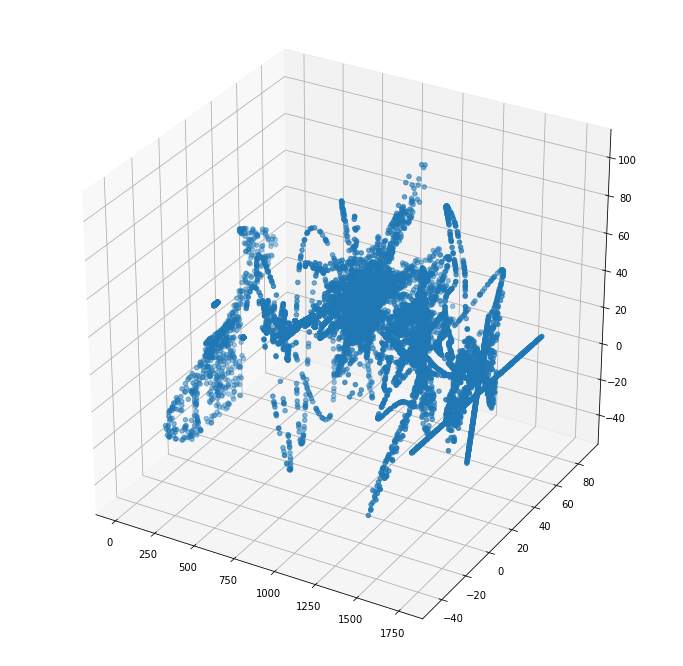

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
def manifold_sampler(X, n_samples, n_outliers=0):
  N = X.shape[0]
  k_n = int(N / n_samples) + 1
  W = np.zeros(N)
  # computing density of samples
  tree = KDTree(X)
  for point in tqdm(range(N)):
    dist, _ = tree.query(X[point:point+1], k=32)
    dist = dist[0][1:]
    W[point] = 1.0 / (1.0 + dist.mean())
  
  landmarks = np.random.choice(N, size=n_samples+n_outliers, replace=False)
  samples = []
  for point in tqdm(range(landmarks.shape[0])):
      l = landmarks[point]
      _, neighbors = tree.query(X[l:l+1], k=k_n)
      neighbors = neighbors[0]
      W_n = W[neighbors]
      W_n /= W_n.sum()
      selected = np.random.choice(neighbors, size=1, p=W_n)[0]
      samples.append(selected)
  samples = np.array(samples)
  return samples

In [ ]:
main_vectors_ind = manifold_sampler(vectors, 15000, p)
main_vectors_ind = main_vectors_ind[np.logical_not(np.isin(main_vectors_ind, np.array(outlier_ind)))]
main_vectors = vectors[main_vectors_ind]

  0%|          | 0/73941 [00:00<?, ?it/s]

  0%|          | 0/15600 [00:00<?, ?it/s]

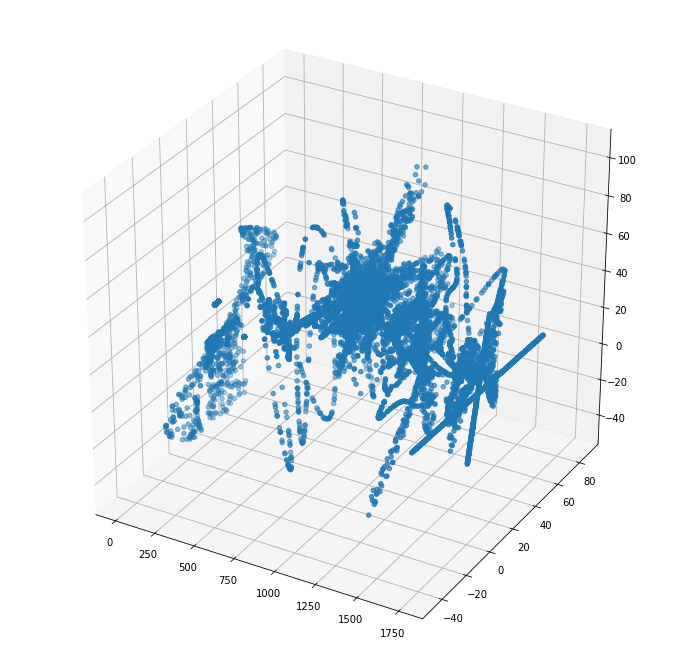

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
reduced = reducer.fit_transform(main_vectors)

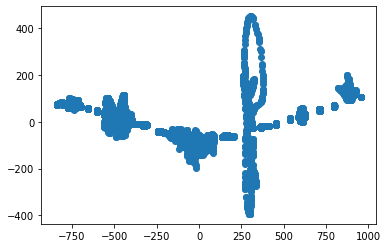

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1])

In [ ]:
from sknetwork.utils import KNNDense

knn_graph = KNNDense(n_neighbors=10).fit_transform(main_vectors)

In [ ]:
from sknetwork.clustering import Louvain

louvain = Louvain(resolution=0.00001)
labels = louvain.fit_transform(knn_graph)

In [ ]:
len(np.unique(labels))

45

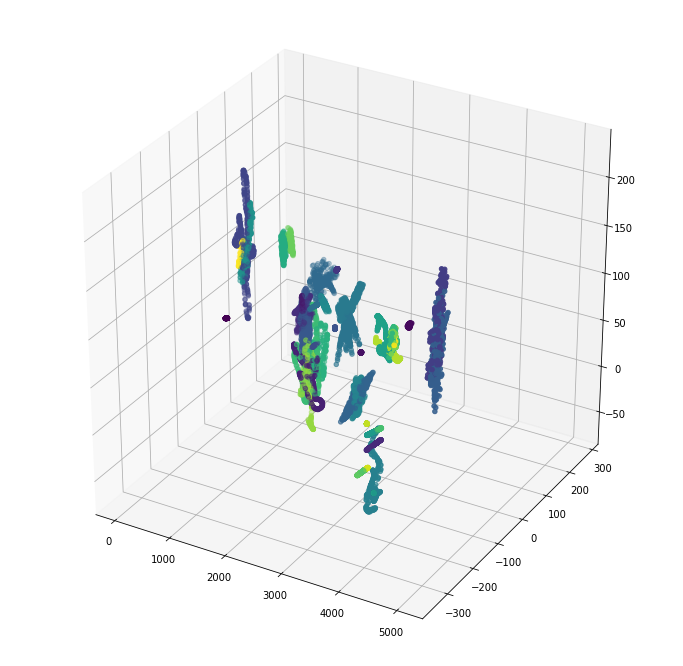

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

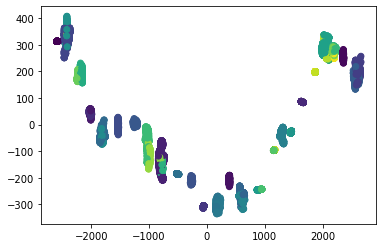

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels)

In [ ]:
import scipy
from functools import lru_cache
from sklearn.covariance import ledoit_wolf
from numba import jit
from scipy.special import softmax

class SparseAffinity():
  def __init__(self, n_data):
    self.n = n_data
    self.storage = [{} for _ in range(self.n)]
  
  def add(self, i, j):
    if j > i:
      i, j = j, i
    
    if not (j in self.storage[i]):
      self.storage[i][j] = 1.0
    else:
      self.storage[i][j] += 1.0
  
  def sparse(self):
    data = []
    row_index = []
    col_index = []

    for i in range(self.n):
      for j,v in self.storage[i].items():
        row_index.append(i)
        col_index.append(j)
        data.append(v)
    
    S = scipy.sparse.csr_matrix((data, (row_index, col_index)),shape=(self.n, self.n))
    return S + S.T
        

class RandomWalkAffinity():  
  def __init__(self, X, tree, path_length):
    self.X = X
    self.tree = tree
    self.path_length = path_length
    self.matrix = SparseAffinity(X.shape[0])

  def get_neighbors(self, point, return_dist=False, drop_first=False, k=16):
    dists, neighbors = self.tree.query(self.X[point:point+1], k=k)
    s = 0
    if drop_first:
      s = 1
    neighbors = neighbors[0][s:]
    dists = dists[0][s:]
    
    if return_dist:
      return neighbors, dists

    return neighbors

  @lru_cache(maxsize=15000)
  def local_cov(self, point):
    neighbors = self.get_neighbors(point, k=64)
    # cov = ledoit_wolf(self.X[neighbors, :])[0]
    cov = np.cov(self.X[neighbors, :])
    return cov

  def cov_sim(self, a, b):
    if a == b:
      return 1.0

    cov_a = self.local_cov(a)
    cov_b = self.local_cov(b)
    dist =  np.linalg.norm(cov_a - cov_b, ord='nuc')
    return 1.0 / (1.0 + dist)
  
  def next_point(self, point, get_probs=False):
    neighbors, dists = self.get_neighbors(point, k=64,
                                          return_dist=True, drop_first=True)
    cov_sim = []
    for n in neighbors:
      cov_sim.append(self.cov_sim(point, n))
    cov_sim = np.array(cov_sim)
    cov_sim /= cov_sim.sum()

    dists = 1.0 / (1 + dists)
    dists /= dists.sum()

    probs = dists * softmax(cov_sim)
    probs /= probs.sum()

    if get_probs:
      return neighbors, probs

    next_point = np.random.choice(neighbors, size=1, p=probs)[0]

    return next_point


  def sample_path(self, initial):
    N = self.X.shape[0]
    path = [initial]
    for hop in range(self.path_length):
      path.append(self.next_point(path[-1]))
    
    for i in range(self.path_length):
      self.matrix.add(path[i], path[i])
      for j in range(i):
        self.matrix.add(path[i], path[j])
  
  def simulate(self):
    N = self.X.shape[0]
    for point in tqdm(range(N)):
      self.sample_path(point)

  def get_transion_matrix(self):
    N = self.X.shape[0]
    matrix = np.zeros((N, N))

    for point in tqdm(range(N)):
      neighbors, probs = self.next_point(point, get_probs=True)
      for n in range(len(neighbors)):
        matrix[point, neighbors[n]] = probs[n]
        matrix[neighbors[n], point] = probs[n]
    
    return scipy.sparse.csr_matrix(matrix)


    

In [ ]:
ra = RandomWalkAffinity(main_vectors, KDTree(main_vectors), 12)

In [ ]:
# ra.simulate()

## Computing the eigenvectors of the similarity matrix

In [ ]:
probs_matrix = ra.get_transion_matrix()

  0%|          | 0/15572 [00:00<?, ?it/s]

In [ ]:
L = scipy.sparse.csgraph.laplacian(probs_matrix)

In [ ]:
L

<15572x15572 sparse matrix of type '<class 'numpy.float64'>'
	with 1181530 stored elements in COOrdinate format>

In [ ]:
# sparse eigen value
top_eigvals, top_eigvecs = scipy.sparse.linalg.eigsh(L, k=40, which='SM')

In [ ]:
top_eigvecs.shape

(15572, 40)

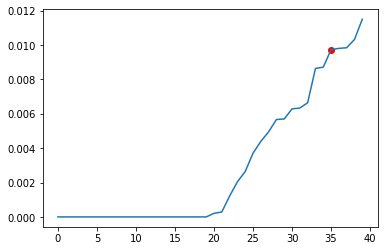

In [ ]:
point = 35
plt.scatter(point, top_eigvals[point], c='red')
_ = plt.plot(top_eigvals)

In [ ]:
m = 34

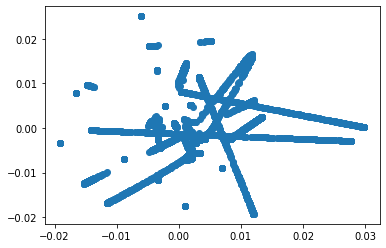

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
reduced_eig_vecs = pca.fit_transform(top_eigvecs[:, :34])

_ = plt.scatter(reduced_eig_vecs[:, 0], reduced_eig_vecs[:, 1])

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=m, covariance_type='full', n_init=4, random_state=0)
gmm.fit(top_eigvecs[:, :m])

GaussianMixture(n_components=34, n_init=4, random_state=0)

## Spectral Clustring Based on Random Walks

In [ ]:
labels = gmm.predict(top_eigvecs[:, :m])

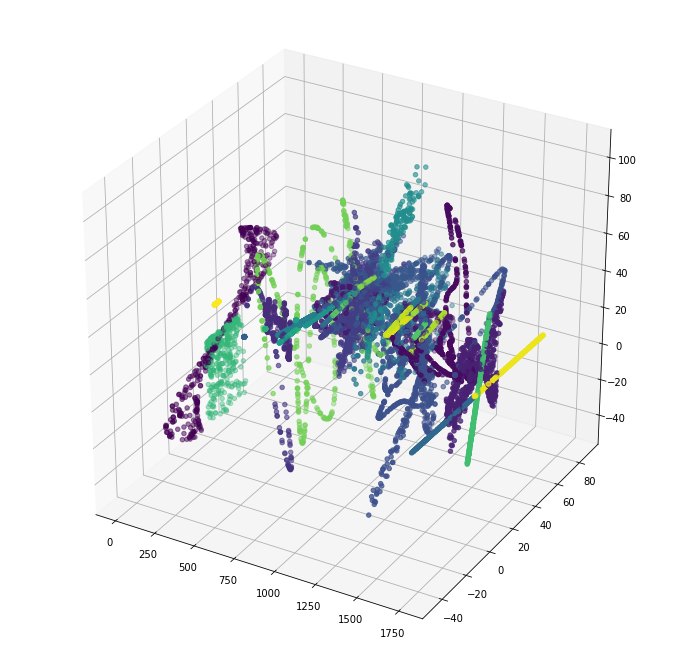

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(main_vectors, labels)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
global_labels = clf.predict(vectors)

In [ ]:
global_labels[outlier_ind] = -1

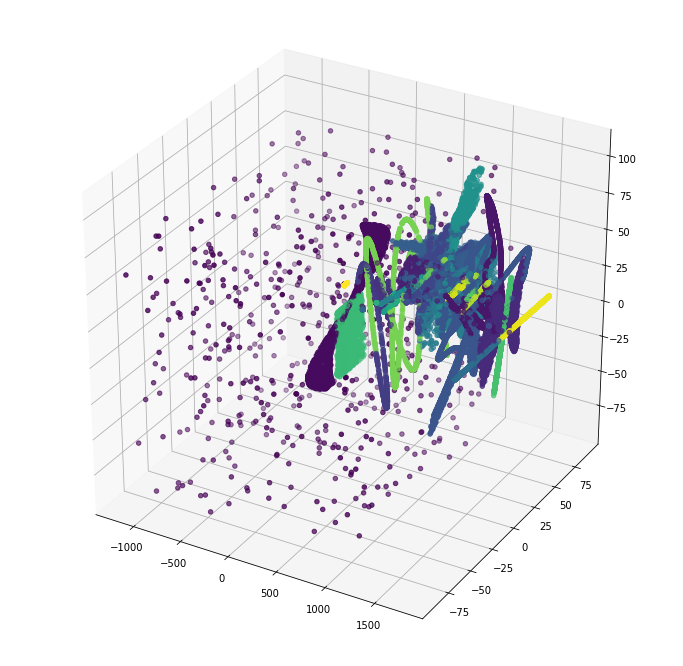

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=global_labels)
_ = plt.show()

In [ ]:
from gap_statistic import OptimalK
from sknetwork.clustering import Louvain
from sknetwork.utils import KNNDense


def estimate_n_clusters_louvain(s_vectors):
  knn_graph = KNNDense().fit_transform(s_vectors)
  louvain = Louvain(resolution=1)
  labels = louvain.fit_transform(knn_graph)
  return labels.max()


def estimate_n_clusters(s_vectors):
  s_local_tangent = get_local_tangent(s_vectors, n_neighbors=21)
  s_probs_matrix = adjusted_random_walk(s_vectors, s_local_tangent,
                                        n_neighbors=32, path_length=16, steps=2)

  s_L = sparse.csgraph.laplacian(s_probs_matrix)
  s_top_eigvals, s_top_eigvecs = sparse.linalg.eigsh(s_L, k=3, which='SM')

  optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')
  n_clusters = optimalK(s_top_eigvecs, cluster_array=np.arange(1, 10))

  return n_clusters



manifolds_K = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 5000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  n_clusters = estimate_n_clusters_louvain(s_vectors)
  print(f'Manifold {manifold} contains {n_clusters} sub-clusters.')
  manifolds_K.append(n_clusters)




Manifold 0 contains 33 sub-clusters.
Manifold 1 contains 86 sub-clusters.
Manifold 2 contains 37 sub-clusters.
Manifold 3 contains 52 sub-clusters.
Manifold 4 contains 56 sub-clusters.
Manifold 5 contains 42 sub-clusters.
Manifold 6 contains 53 sub-clusters.
Manifold 7 contains 14 sub-clusters.
Manifold 8 contains 75 sub-clusters.
Manifold 9 contains 46 sub-clusters.
Manifold 10 contains 15 sub-clusters.
Manifold 11 contains 19 sub-clusters.
Manifold 12 contains 28 sub-clusters.
Manifold 13 contains 37 sub-clusters.
Manifold 14 contains 28 sub-clusters.
Manifold 15 contains 16 sub-clusters.
Manifold 16 contains 34 sub-clusters.
Manifold 17 contains 23 sub-clusters.
Manifold 18 contains 25 sub-clusters.
Manifold 19 contains 13 sub-clusters.
Manifold 20 contains 27 sub-clusters.
Manifold 21 contains 14 sub-clusters.
Manifold 22 contains 35 sub-clusters.
Manifold 23 contains 14 sub-clusters.
Manifold 24 contains 26 sub-clusters.
Manifold 25 contains 25 sub-clusters.
Manifold 26 contains 6

In [ ]:
manifolds_K_w = 1.0 * np.array(manifolds_K)
manifolds_K_w /= manifolds_K_w.sum()
K = np.maximum(np.round(manifolds_K_w * (k+1)), 1).astype(int)

In [ ]:
k

56

In [ ]:
K

array([2, 5, 2, 3, 3, 2, 3, 1, 4, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
K.sum()

56

In [ ]:
import skdim.id as intd

manifold_dims = []

for manifold in tqdm(range(m)):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  lpca = intd.lPCA().fit_pw(s_vectors, n_neighbors = 128, n_jobs = 1)
  int_D = int(np.round(np.quantile(lpca.dimension_pw_, 0.2)))
  # int_D = int(np.round(lpca.dimension_pw_.mean()))
  print(f'Manifold {manifold} has dim {int_D}')
  manifold_dims.append(int_D)
  

  0%|          | 0/34 [00:00<?, ?it/s]

Manifold 0 has dim 3
Manifold 1 has dim 3
Manifold 2 has dim 3
Manifold 3 has dim 2
Manifold 4 has dim 3
Manifold 5 has dim 2
Manifold 6 has dim 2
Manifold 7 has dim 11
Manifold 8 has dim 3
Manifold 9 has dim 3
Manifold 10 has dim 11
Manifold 11 has dim 1
Manifold 12 has dim 2
Manifold 13 has dim 2
Manifold 14 has dim 1
Manifold 15 has dim 11
Manifold 16 has dim 3
Manifold 17 has dim 2
Manifold 18 has dim 2
Manifold 19 has dim 12
Manifold 20 has dim 2
Manifold 21 has dim 11
Manifold 22 has dim 3
Manifold 23 has dim 11
Manifold 24 has dim 1
Manifold 25 has dim 2
Manifold 26 has dim 2
Manifold 27 has dim 2
Manifold 28 has dim 1
Manifold 29 has dim 1
Manifold 30 has dim 1
Manifold 31 has dim 1
Manifold 32 has dim 1
Manifold 33 has dim 1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


class AffineManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    XS = X - self.shift
    self.dim = X.shape[1] - self.int_dim
    self.pca = PCA()
    self.pca.fit(XS)
  
  def check(self, thresh=0.1):
    ev = self.pca.explained_variance_[-self.dim:].mean()
    if ev < thresh:
      return True
    return False
  
  def get_affine(self):
    a = self.pca.components_[-self.dim:]
    b = a @ self.shift
    a = a.T
    return a, b
    
class SphereManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    self.dim = X.shape[1] - self.int_dim
    center, radius = self.noisy_center_radius(X, 5)
    self.center = center
    self.radius = radius
    error = np.abs(np.linalg.norm(X - center, axis=1) - radius)
    self.error_std = np.std(error)
    self.error_mean = np.mean(error)
    self.aff = AffineManifold(self.int_dim)
    self.aff.fit(X)

  def check(self, thresh=5.0):
    # print('std ', self.error_std)
    # print('mean', self.error_mean)
    # print('radius', self.radius)
    if (self.error_std < thresh) and (self.error_mean < 0.3*self.radius):
      return True
    return False

  def noisy_center_radius(self, points, k):
    dist_matrix = np.zeros((points.shape[0], points.shape[0]))
    for i in range(points.shape[0]):
      for j in range(i):
        dist = np.linalg.norm(points[i] - points[j])
        dist_matrix[i, j] = dist
    dist_matrix = dist_matrix.reshape(-1)
    top_k_dist = np.argsort(dist_matrix)[-k:]
    rows = top_k_dist // points.shape[0]
    cols = top_k_dist % points.shape[0]
    center = 0.5*(points[cols] + points[rows]).mean(axis=0)
    radius = dist_matrix[top_k_dist].mean()/2
    return center, radius
  
  def get_affine(self):
    return self.aff.get_affine()
  



def manifold_type(points, int_d):
  sph = SphereManifold(int_d)
  sph.fit(points)
  if sph.check():
    return 'Sphere', sph
  # test affinity
  aff = AffineManifold(int_d)
  aff.fit(points)
  if aff.check():
    return 'Affine', aff
  return 'Complex', None

manifolds_types = []
manifolds_specs = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 1200)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  mantype, spec = manifold_type(s_vectors, manifold_dims[manifold])
  print(f'Manifold {manifold} is {manifold_dims[manifold]}-{mantype}')
  manifolds_types.append(mantype)
  manifolds_specs.append(spec)

Manifold 0 is 3-Complex
Manifold 1 is 3-Complex
Manifold 2 is 3-Complex
Manifold 3 is 2-Complex
Manifold 4 is 3-Complex
Manifold 5 is 2-Complex
Manifold 6 is 2-Complex
Manifold 7 is 11-Sphere
Manifold 8 is 3-Complex
Manifold 9 is 3-Complex
Manifold 10 is 11-Sphere
Manifold 11 is 1-Affine
Manifold 12 is 2-Affine
Manifold 13 is 2-Complex
Manifold 14 is 1-Affine
Manifold 15 is 11-Sphere
Manifold 16 is 3-Complex
Manifold 17 is 2-Affine
Manifold 18 is 2-Affine
Manifold 19 is 12-Sphere
Manifold 20 is 2-Affine
Manifold 21 is 11-Sphere
Manifold 22 is 3-Complex
Manifold 23 is 11-Sphere
Manifold 24 is 1-Affine
Manifold 25 is 2-Affine
Manifold 26 is 2-Complex
Manifold 27 is 2-Affine
Manifold 28 is 1-Affine
Manifold 29 is 1-Affine
Manifold 30 is 1-Affine
Manifold 31 is 1-Affine
Manifold 32 is 1-Affine
Manifold 33 is 1-Affine


In [ ]:
np.unique(global_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33])

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


sub_clusters = []
for sphere in tqdm(range(m)):
  points = vectors[global_labels==sphere]
  original_index = np.where(global_labels==sphere)[0]

  sub_manifold_size = points.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  # s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_sample_ind = manifold_sampler(points, s_sample_size)
  s_vectors = points[s_sample_ind, :]

  s_cluster = SpectralClustering(n_clusters=K[sphere], random_state=0, affinity='nearest_neighbors')
  s_cluster.fit(s_vectors)

  s_labels = s_cluster.labels_

  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(s_vectors, s_labels)

  sub_manifold_labels = clf.predict(points)


  submanifold_clusters = []
  for subc in range(K[sphere]):
    submanifold_clusters.append(original_index[np.where(sub_manifold_labels == subc)])
  sub_clusters.append(submanifold_clusters)

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/1701 [00:00<?, ?it/s]

  0%|          | 0/1701 [00:00<?, ?it/s]

  0%|          | 0/5371 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2199 [00:00<?, ?it/s]

  0%|          | 0/2199 [00:00<?, ?it/s]

  0%|          | 0/5258 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4046 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2196 [00:00<?, ?it/s]

  0%|          | 0/2196 [00:00<?, ?it/s]

  0%|          | 0/6531 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2188 [00:00<?, ?it/s]

  0%|          | 0/2188 [00:00<?, ?it/s]

  0%|          | 0/5443 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3945 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1657 [00:00<?, ?it/s]

  0%|          | 0/1657 [00:00<?, ?it/s]

  0%|          | 0/1027 [00:00<?, ?it/s]

  0%|          | 0/1027 [00:00<?, ?it/s]

  0%|          | 0/1008 [00:00<?, ?it/s]

  0%|          | 0/1008 [00:00<?, ?it/s]

  0%|          | 0/2317 [00:00<?, ?it/s]

  0%|          | 0/2317 [00:00<?, ?it/s]

  0%|          | 0/1992 [00:00<?, ?it/s]

  0%|          | 0/1992 [00:00<?, ?it/s]

  0%|          | 0/1816 [00:00<?, ?it/s]

  0%|          | 0/1816 [00:00<?, ?it/s]

  0%|          | 0/1945 [00:00<?, ?it/s]

  0%|          | 0/1945 [00:00<?, ?it/s]

  0%|          | 0/770 [00:00<?, ?it/s]

  0%|          | 0/770 [00:00<?, ?it/s]

  0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1925 [00:00<?, ?it/s]

  0%|          | 0/1925 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1736 [00:00<?, ?it/s]

  0%|          | 0/1736 [00:00<?, ?it/s]

  0%|          | 0/1701 [00:00<?, ?it/s]

  0%|          | 0/1701 [00:00<?, ?it/s]

  0%|          | 0/1705 [00:00<?, ?it/s]

  0%|          | 0/1705 [00:00<?, ?it/s]

  0%|          | 0/1593 [00:00<?, ?it/s]

  0%|          | 0/1593 [00:00<?, ?it/s]

  0%|          | 0/843 [00:00<?, ?it/s]

  0%|          | 0/843 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/849 [00:00<?, ?it/s]

  0%|          | 0/849 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/1378 [00:00<?, ?it/s]

  0%|          | 0/1403 [00:00<?, ?it/s]

  0%|          | 0/1403 [00:00<?, ?it/s]

  0%|          | 0/1183 [00:00<?, ?it/s]

  0%|          | 0/1183 [00:00<?, ?it/s]

  0%|          | 0/1151 [00:00<?, ?it/s]

  0%|          | 0/1151 [00:00<?, ?it/s]

  0%|          | 0/1830 [00:00<?, ?it/s]

  0%|          | 0/1830 [00:00<?, ?it/s]

In [ ]:
with open('output.txt', 'w+') as fp:
  fp.write(f'{n} {m}\n')
  for manifold in range(m):
    fp.write(f'{manifold_dims[manifold]} {K[manifold]} {manifolds_types[manifold]}\n')
    if manifolds_types[manifold] in ['Affine', 'Sphere']:
      if manifold_dims[manifold] == d:
        fp.write('\n')
      else:
        spec = manifolds_specs[manifold]
        affine_a, affine_b = spec.get_affine()
        for i in range(affine_a.shape[1]):
          fp.write(' '.join(affine_a[:, i].astype(str).tolist()) + '\n')
        fp.write(' '.join(affine_b.astype(str).tolist()) + '\n')
      if manifolds_types[manifold] == 'Sphere':
        fp.write(' '.join(spec.center.astype(str).tolist()) + f' {spec.radius} \n')
    for subc in range(K[manifold]):
      subc_points = sub_clusters[manifold][subc]
      fp.write(f'{len(subc_points)} ')
      fp.write(' '.join((subc_points+1).astype(str).tolist()))
      fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((np.array(outlier_ind)+1).astype(str).tolist()))

In [ ]:
!zip solution.zip output.txt

  adding: output.txt (deflated 56%)
